# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

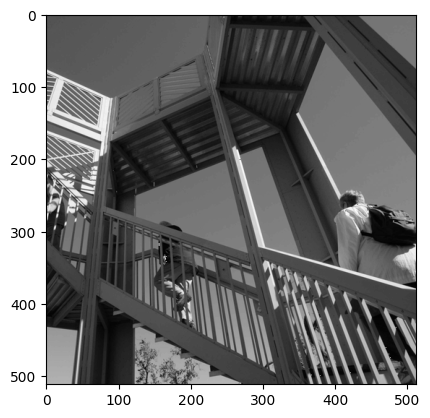

In [90]:
X = misc.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

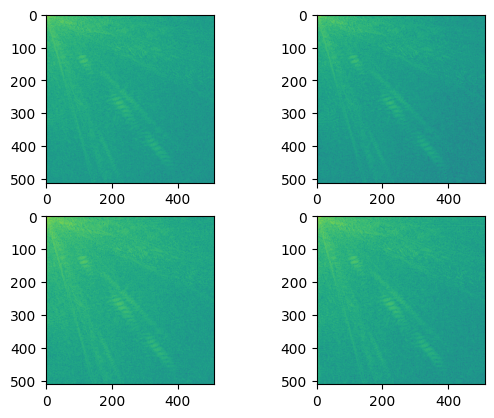

In [91]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

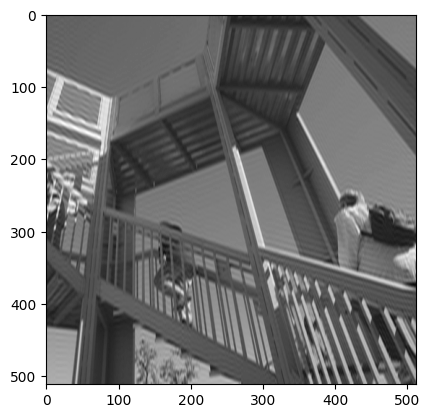

In [92]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

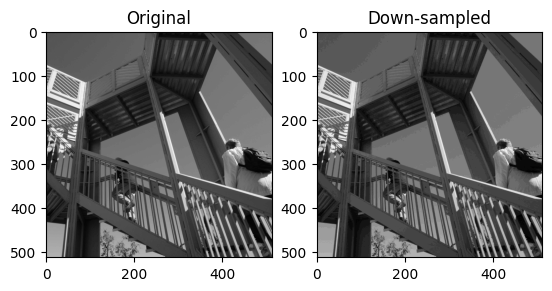

In [93]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

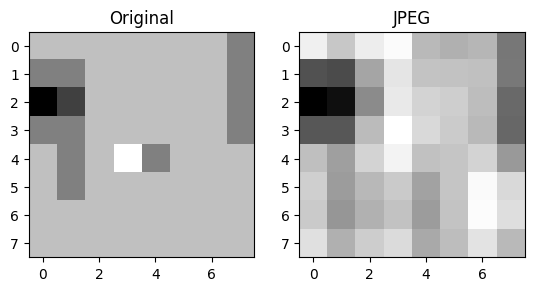

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [94]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

In [95]:
import zlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn
import PIL.Image as Image

In [96]:
Q_jpeg = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]])
block_size = 8

In [120]:
class JPEGAlgorithm:
    def __init__(self, Q_matrix, factor=1):
        self.Q_matrix = factor * Q_matrix
        self.padding = [0, 0]
        self.original_dimensions = (0, 0)
        self.fps = 0
        self.frame_count = 0
        self.frame_width = 0
        self.frame_height = 0

    def apply_dct_quantization(self, block):
        block_dct = dctn(block, type=2)
        block_quantized = np.round(block_dct / self.Q_matrix).astype(np.int32)
        return block_quantized

    def compress_grayscale_image(self, image):
        original_height, original_width = image.shape[0], image.shape[1]

        # Calculate padding
        if original_height % 8 != 0:
            self.padding[0] = block_size - original_height % 8
        if original_width % 8 != 0:
            self.padding[1] = block_size - original_width % 8

        new_image = np.pad(image, ((0, self.padding[0]), (0, self.padding[1])), mode='edge')
        height, width = new_image.shape[0], new_image.shape[1]

        compressed_image = np.zeros((height // block_size, width // block_size), dtype=object)
        for i in range(0, height, block_size):
            for j in range(0, width, block_size):
                block = new_image[i:i + block_size, j:j + block_size]
                block_quantized = self.apply_dct_quantization(block)
                block = zlib.compress(block_quantized.flatten().tobytes())
                compressed_image[i // block_size, j // block_size] = block
        self.original_dimensions = (original_height, original_width)

        return compressed_image

    def compress_rgb_image(self, image):
        yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YCR_CB)

        # Compress  each channel separately
        compressed_channels = [self.compress_grayscale_image(yuv[:, :, i]) for i in range(3)]

        return compressed_channels

    def apply_inverse_dct_quantization(self, block_quantized):
        block_dct = block_quantized * self.Q_matrix
        block_idct = idctn(block_dct, type=2)
        return block_idct

    def decompress_grayscale_image(self, compressed_image):
        height, width = compressed_image.shape
        height *= block_size
        width *= block_size
        decompressed_image = np.zeros((height, width), dtype=np.int32)
        for i in range(0, height, block_size):
            for j in range(0, width, block_size):
                block_decompressed = zlib.decompress(compressed_image[i // block_size, j // block_size])
                block_decompressed = np.frombuffer(block_decompressed, dtype=np.int32)
                block_decompressed = block_decompressed.reshape(block_size, block_size)
                block_decompressed = self.apply_inverse_dct_quantization(block_decompressed)
                decompressed_image[i:i + block_size, j:j + block_size] = block_decompressed

        decompressed_image = decompressed_image[:self.original_dimensions[0], :self.original_dimensions[1]]
        return decompressed_image

    def decompress_rgb_image(self, compressed_image):

        decompressed_channels = [self.decompress_grayscale_image(compressed_channel) for compressed_channel in
                                 compressed_image]

        # Stack the decompressed channels back together
        decompressed_yuv = np.uint8(np.stack(decompressed_channels, axis=-1))

        # Convert the decompressed YCrCb back to RGB
        decompressed_rgb = (cv2.cvtColor(decompressed_yuv, cv2.COLOR_YCR_CB2RGB)).astype(np.int32)

        return decompressed_rgb

    # Compress and decompress videos
    def compress_video(self, input_path,output_path):
        cap = cv2.VideoCapture(input_path)
        fps = cap.get(cv2.CAP_PROP_FPS)

        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        self.fps = fps
        self.frame_count = frame_count
        self.frame_width = frame_width
        self.frame_height = frame_height

        print(f"Frames:{frame_count}")
        # wirte in a file
        fourcc = cv2.VideoWriter_fourcc(*"mp4v")
        out = cv2.VideoWriter(output_path, fourcc, self.fps, (self.frame_width, self.frame_height))

        while True:
            ret, frame = cap.read()
            if not ret:
                break
            # Compress each frame
            compressed_frame = self.compress_rgb_image(frame)
            # Uncompress each frame
            decompressed_frame = self.decompress_rgb_image(compressed_frame)

            # Write the decompress frame
            out.write(decompressed_frame.astype(np.uint8))

        out.release()
        cap.release()

In [98]:
def get_mse_err(image1,image2):
    mse =  np.mean((image1 - image2)**2)
    return mse


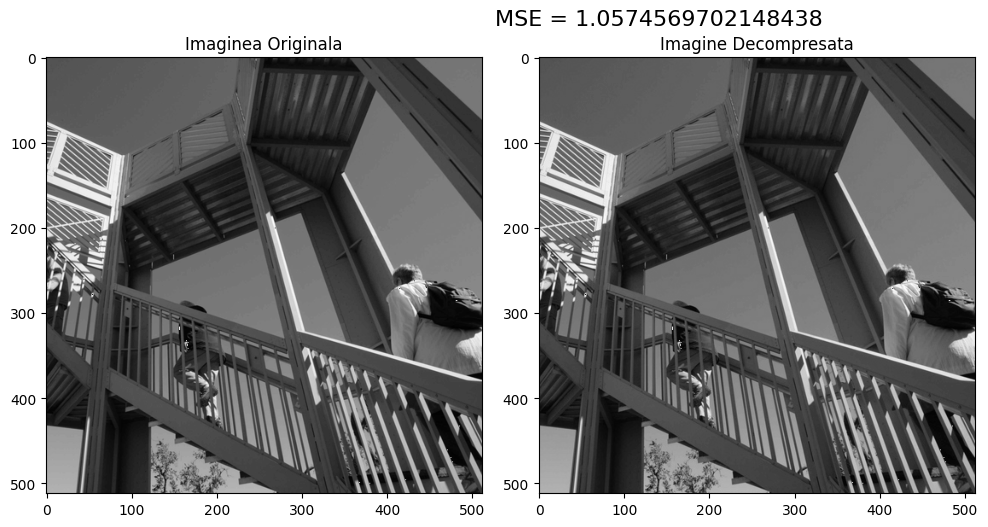

In [115]:

# 1
X = misc.ascent()

jpeg_alg = JPEGAlgorithm(Q_jpeg)

compressed = jpeg_alg.compress_grayscale_image(X)
decompressed = jpeg_alg.decompress_grayscale_image(compressed)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
fig.text(0.5,0.75,f"MSE = {get_mse_err(X, decompressed)}", fontsize=16)
axes[0].imshow(X, cmap=plt.cm.gray)
axes[0].set_title('Imaginea Originala')

axes[1].imshow(decompressed, cmap=plt.cm.gray)
axes[1].set_title('Imagine Decompresata')
fig.tight_layout()
plt.show()


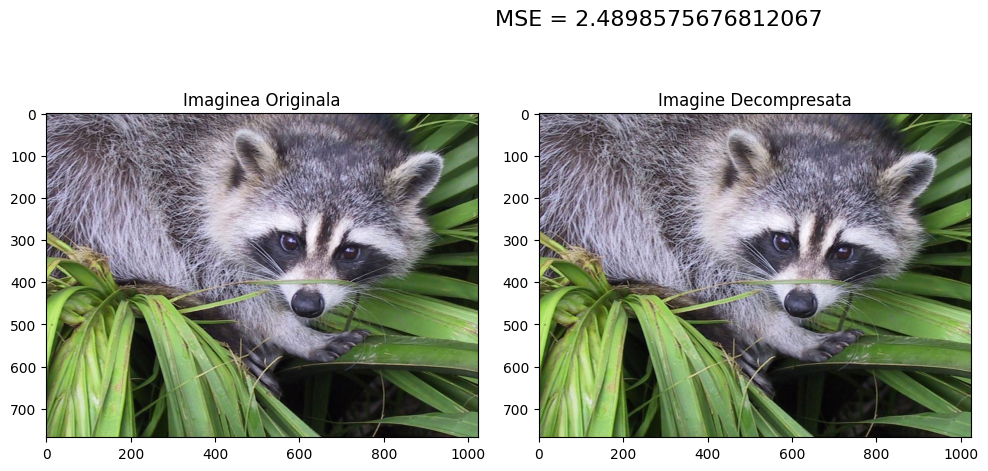

In [100]:

# 2
X = misc.face()

jpeg_alg = JPEGAlgorithm(Q_jpeg)

compressed = jpeg_alg.compress_rgb_image(X)
decompressed = jpeg_alg.decompress_rgb_image(compressed)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
fig.text(0.5,0.75,f"MSE = {get_mse_err(X, decompressed)}", fontsize=16)
axes[0].imshow(X)
axes[0].set_title('Imaginea Originala')

axes[1].imshow(decompressed)
axes[1].set_title('Imagine Decompresata')
fig.tight_layout()
plt.show()



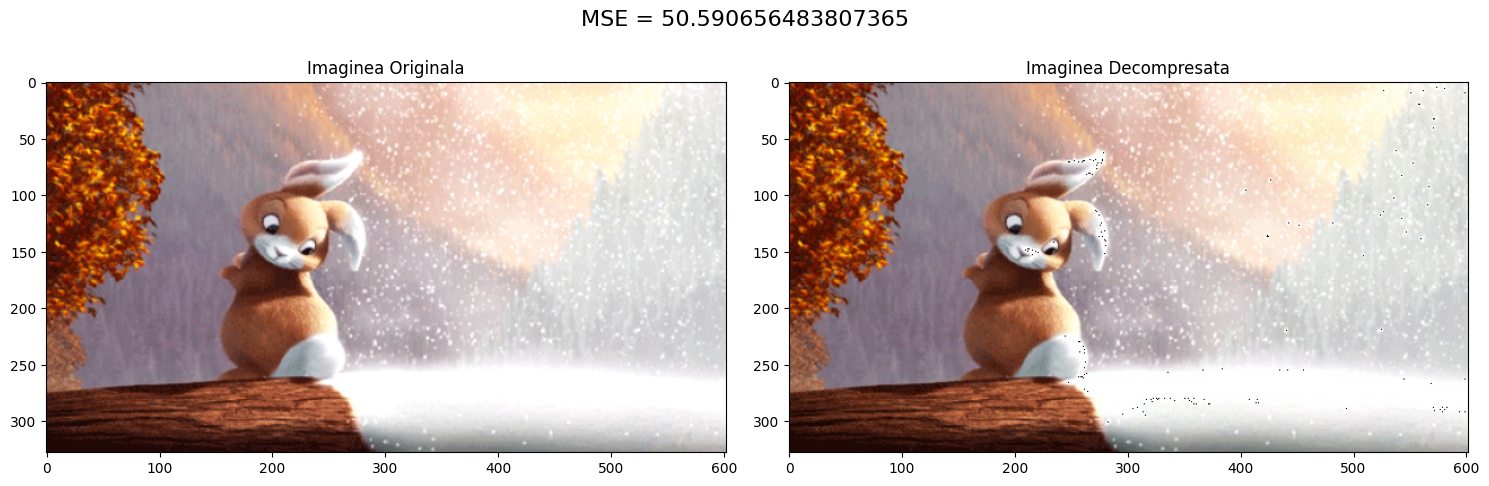

(328, 602, 3)


In [119]:
from skimage import io
# Test padding for images that have dimension not divisible with block_size
image_path = 'bunny.png'
original_image = io.imread(image_path)
original_image= original_image[:, :, :3]
jpeg_alg = JPEGAlgorithm(Q_jpeg)
compressed = jpeg_alg.compress_rgb_image(original_image)
with open('bunny_compress.pkl', 'wb') as f:
    pickle.dump(compressed, f)
decompressed = jpeg_alg.decompress_rgb_image(compressed)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(f"MSE = {get_mse_err(original_image, decompressed)}", fontsize=16)
axes[0].imshow(original_image)
axes[0].set_title('Imaginea Originala')

axes[1].imshow(decompressed)
axes[1].set_title('Imaginea Decompresata')

fig.tight_layout()
plt.show()
print(decompressed.shape)


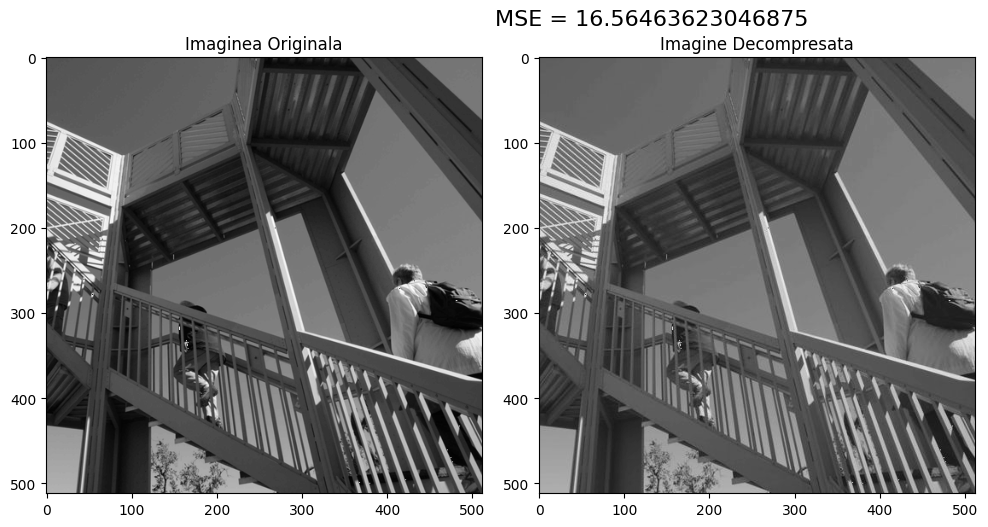

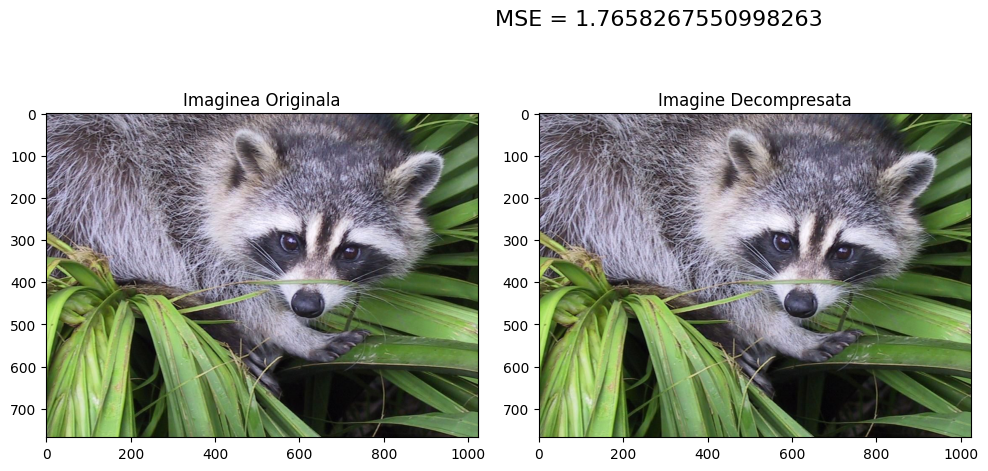

In [102]:
# 3
X = misc.ascent()
factor = 10
jpeg_alg = JPEGAlgorithm(Q_jpeg, factor)


compressed = jpeg_alg.compress_grayscale_image(X)
decompressed = jpeg_alg.decompress_grayscale_image(compressed)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
fig.text(0.5,0.75,f"MSE = {get_mse_err(X, decompressed)}", fontsize=16)
axes[0].imshow(X, cmap=plt.cm.gray)
axes[0].set_title('Imaginea Originala')

axes[1].imshow(decompressed, cmap=plt.cm.gray)
axes[1].set_title('Imagine Decompresata')
fig.tight_layout()
plt.show()

X = misc.face()
factor = 0.5
jpeg_alg = JPEGAlgorithm(Q_jpeg, factor)


compressed = jpeg_alg.compress_rgb_image(X)
decompressed = jpeg_alg.decompress_rgb_image(compressed)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
fig.text(0.5,0.75,f"MSE = {get_mse_err(X, decompressed)}", fontsize=16)
axes[0].imshow(X)
axes[0].set_title('Imaginea Originala')

axes[1].imshow(decompressed)
axes[1].set_title('Imagine Decompresata')
fig.tight_layout()
plt.show()

In [107]:
# Compress and decompress videos
def compress_video(input_path, output_path, Q_matrix, factor=1):
    cap = cv2.VideoCapture(input_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
  
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    jpeg_alg = JPEGAlgorithm(Q_matrix, factor)

    # write in a file
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Compress each frame
        compressed_frame = jpeg_alg.compress_rgb_image(frame)

        # Uncompress each frame
        decompressed_frame = jpeg_alg.decompress_rgb_image(compressed_frame)

        # Write the decompress frame
        out.write(decompressed_frame.astype(np.uint8))

    cap.release()
    out.release()


input_video_path = 'shorter_shorter_video.mp4'
output_video_path = 'output_video_compressed.mp4'

compress_video(input_video_path, output_video_path, Q_jpeg, factor=100)


In [ ]:
import pickle
jpeg_alg = JPEGAlgorithm(Q_jpeg, 600)
input_video_path = 'shorter_shorter_video.mp4'
output_video_path = 'output_video_compressed.mp4'

jpeg_alg.compress_video(input_video_path,output_video_path)
